# **Collecting Data**
This dataset for orange resistance is from kaggle :
1. https://www.kaggle.com/sriramr/fruits-fresh-and-rotten-for-classification

For this model, we take only the good quality orange dataset. 

Before start, ensure to download dataset. We already zip it to drive in link below 
https://drive.google.com/file/d/1eDk3JkUpz5mqfvCkE1ZuZ8UFa-w8IfLG/view?usp=sharing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive

#to connect drive account to colab
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
import shutil
import os

source = r'/content/gdrive/MyDrive/orange_new.zip'
destination = r'/content/orange.zip'
shutil.copyfile(source, destination)

'/content/orange.zip'

In [4]:
#to extract the zip format of dataset
import zipfile 
local_zip = destination
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

# **Explore dataset & preprocessing**

In [5]:
path = r'/content/orange/'
categories= os.listdir(path)
categories

['3', '12', '1', '7']

12, 7, 1, 3 means that the fruit is still good for 12 more days, 7 more days, 1 more days or 3 more days

In [6]:
def count_num_file(path,name_dir):
  num_file = len(os.listdir(path+name_dir))
  return num_file
  
for categorie in categories :
  print("{} more days directory : {} file ".format(categorie, count_num_file(path,categorie)))

3 more days directory : 288 file 
12 more days directory : 741 file 
1 more days directory : 72 file 
7 more days directory : 469 file 


**Image Augmentation**


---


1 more days directory have small number of file (72) compare to the large one is 7 more days that have 469 file. So we add more augmentation on that directory. 

In [7]:
import os
from PIL import Image 
path_rotate = r'/content/orange/1/'
file_name = os.listdir(path_rotate)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(40).save(path_rotate+'rotate_40'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(50).save(path_rotate+'rotate_50'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(65).save(path_rotate+'rotate_65'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(85).save(path_rotate+'rotate_85'+i)
            
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(100).save(path_rotate+'rotate_100'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(125).save(path_rotate+'rotate_125'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(145).save(path_rotate+'rotate_145'+i)
for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(200).save(path_rotate+'rotate_200'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(225).save(path_rotate+'rotate_225'+i)

for i in file_name:
  if i.startswith("vertical_flip"):
    img = Image.open(path_rotate+i)
    rotate_img= img.rotate(240).save(path_rotate+'rotate_240'+i)

In [9]:
for categorie in categories :
  print("{} more days folder : {} file ".format(categorie, count_num_file(path,categorie)))

3 more days folder : 288 file 
12 more days folder : 741 file 
1 more days folder : 152 file 
7 more days folder : 469 file 


**Look at the dataset (plot)**

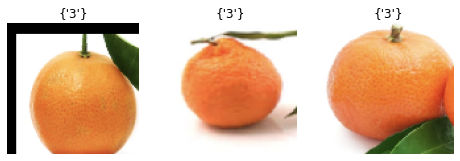

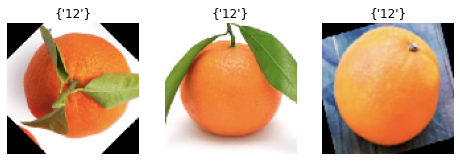

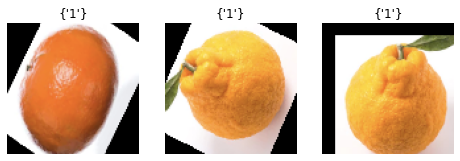

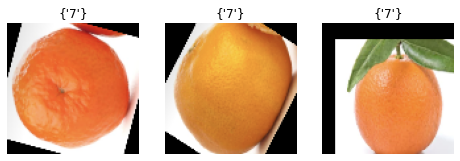

In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline


def plot_img(name):
  img = [fn for fn in os.listdir(f'{path}/{name}')]
  select_img= np.random.choice(img, 3, replace = False)
  
  fig = plt.figure(figsize = (8,6))
  for i in range(3):
      if i < 3:
        fp = f'{path}/{name}/{select_img[i]}'
        label = {name}
      
      ax = fig.add_subplot(1,3,i+1)
    
      fn = image.load_img(fp, target_size = (100,100))
      plt.imshow(fn)
      plt.title(label)
      plt.axis('off')
  plt.show()

for categorie in categories:
  plot_img(categorie)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,                 
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    shear_range=0.2,
                    horizontal_flip=True,
                    vertical_flip=True,
                    fill_mode = 'nearest',
                    validation_split=0.2)

In [14]:
train_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='training')
val_generator = train_datagen.flow_from_directory(
        path,  
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1322 images belonging to 4 classes.
Found 328 images belonging to 4 classes.


# Build model with simple CNN

In [30]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    
    #menambahkan neural network
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(256, activation='relu'),
   
    tf.keras.layers.Dense(4, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 33856)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               8667392   
_________________________________________________________________
dense_7 (Dense)              (None, 4)                

In [31]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [32]:
history=model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=50,
      validation_data=val_generator, 
      validation_steps=5, 
      verbose=1)

Epoch 1/50
25/25 [==============================] - 24s 933ms/step - loss: 1.5044 - accuracy: 0.4152 - val_loss: 1.1871 - val_accuracy: 0.5312
Epoch 2/50
25/25 [==============================] - 23s 907ms/step - loss: 1.2924 - accuracy: 0.4357 - val_loss: 1.2359 - val_accuracy: 0.4375
Epoch 3/50
25/25 [==============================] - 23s 909ms/step - loss: 1.2547 - accuracy: 0.4653 - val_loss: 1.2358 - val_accuracy: 0.4313
Epoch 4/50
25/25 [==============================] - 23s 908ms/step - loss: 1.2440 - accuracy: 0.4434 - val_loss: 1.2552 - val_accuracy: 0.4187
Epoch 5/50
25/25 [==============================] - 23s 928ms/step - loss: 1.2432 - accuracy: 0.4500 - val_loss: 1.2421 - val_accuracy: 0.4250
Epoch 6/50
25/25 [==============================] - 23s 909ms/step - loss: 1.2301 - accuracy: 0.4280 - val_loss: 1.2199 - val_accuracy: 0.3187
Epoch 7/50
25/25 [==============================] - 23s 908ms/step - loss: 1.2196 - accuracy: 0.4627 - val_loss: 1.2801 - val_accuracy: 0.4750

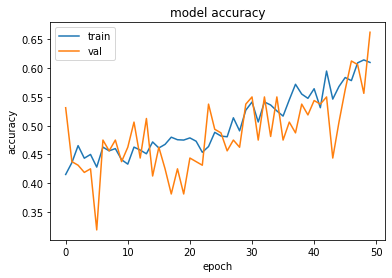

In [33]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

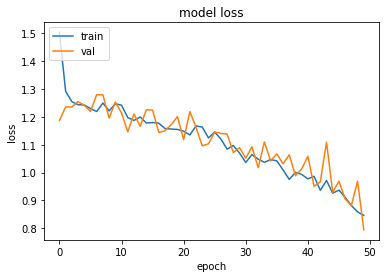

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [35]:
score_train = model.evaluate(train_generator)
score_valid = model.evaluate(val_generator)

print('Accuracy train: ', score_train[1])
print('Accuracy test: ', score_valid[1])

11/11 [==============================] - 4s 323ms/step - loss: 0.9026 - accuracy: 0.5945
Accuracy train:  0.6232980489730835
Accuracy test:  0.5945122241973877
